# Linear Programming

## 1. Introduction


In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pulp import *

***Example***<br>
Giapetto’s Woodcarving, Inc., manufactures two types of wooden toys: soldiers and trains. A soldier sells for $27 and uses $10 worth of raw materials. Each soldier that is manufactured increases Giapetto’s variable labor and overhead costs by $14. A train sells for $21 and uses $9 worth of raw materials. Each train built increases Giapetto’s variable labor and overhead costs by $10. The manufacture of wooden soldiers and trains requires two types of skilled labor: carpentry and finishing. A soldier requires 2 hours of finishing labor and 1 hour of carpentry labor. A train requires 1 hour of finishing and 1 hour of carpentry labor. Each week, Giapetto can obtain all the needed raw material but only 100 finishing hours and 80 carpentry hours. Demand for trains is unlimited, but at most 40 soldiers are bought each week. Giapetto wants to maximize weekly profit (revenues – costs). Formulate a mathematical model of Giapetto’s situation that can be used to maximize Giapetto’s weekly profit.

***Solution***<br>
Let $x_s$ and $x_t$ equal the number of soldiers and trains produced, respectively:
$$\text{profit} = x_s (27 - 10 - 14) + x_t (21 - 9 - 10)$$
$$=3x_s + 2x_t$$

<br>

\begin{align*}
\max                \quad   &   3x_s + 2x_t\\
\text{s.t.}         \quad   &   2x_s + x_t \le 100\\
                    \quad   &   x_s + x_t \le 80\\
                    \quad   &   x_s \le 40\\
                    \quad   &   x_s,x_t \in \mathbb{Z}^+
\end{align*}

The constraints here are:
- The weekly sum of finishing labor hours taken to produce soldiers and trains must not exceed 100 hours.
- The weekly sum of carpentry labor hours taken to produce soldiers and trains must not exceed 80 hours.
- The weekly quantity produced of soldiers must be at most the demand for soldiers.
- The quantity of soldiers and trains must be positive integers.
$$\text{ }$$

In [234]:
products = ["soldiers", "trains"]
resources = ["finishing", "carpentry"]

product_data = pd.DataFrame([
    [27, 10, 14],
    [21,  9, 10]
], index=products, columns=["revenue", "material_cost", "var_cost"])

model = LpProblem("maximize_profit", LpMaximize)

x = LpVariable.dicts("x", products, lowBound=0, cat="Integer")

model += lpSum([
    x[p] * (
        product_data.loc[p, "revenue"] - product_data.loc[p, "material_cost"] - product_data.loc[p, "var_cost"]
    ) for p in products
])

model += 2 * x["soldiers"] + x["trains"] <= 100
model += x["soldiers"] + x["trains"] <= 80
model += x["soldiers"] <= 40

model.solve()

if model.status == 1:
    
    for k, v in x.items():
        print(f"{k} = {v.varValue} units")

soldiers = 20.0 units
trains = 60.0 units


The core components of a **linear programming problem** are:
1. Maximization/minimization of a *linear* function of the decision variable - this function is the *objective function*.

2. The values of the decision variables must satisfy a set of *constraints*, each a linear equation or linear inequality.

3. A *sign restriction* is associated with each variable; for any variable $x_i$, the sign restriction specifies that $x_i$ must either be nonnegative $\left(x_i \ge 0 \right)$ or unrestricted in sign $\left( \text{urs} \right)$.

### Problems

1. Farmer Jones must determine how many acres of corn and wheat to plant this year. An acre of wheat yields 25 bushels of wheat and requires 10 hours of labor per week. An acre of corn yields 10 bushels of corn and requires 4 hours of labor per week. All wheat can be sold at $4 a bushel, and all corn can be sold at $3 a bushel. Seven acres of land and 40 hours per week of labor are available. Government regulations require that at least 30 bushels of corn be produced during the current year. Let $x_1$ = number of acres of corn planted, and $x_2$ = number of acres of wheat planted. Using these decision variables, formulate an LP whose solution will tell Farmer Jones how to maximize the total revenue from wheat and corn.

$$\text{revenue} = (10 \times 3)x_1 + (25 \times 4)x_2$$
$$=30x_1 + 100x_2$$

<br>

\begin{align*}

\max            \quad   &   30x_1 + 100x_2          \\
\text{s.t.}     \quad   &   x_1 + x_2 \le 7  \quad & \text{(Land Constraint)}         \\
                \quad   &   4x_1 + 10x_2 \le 40 \quad &  \text{(Labor Constraint)}     \\
                \quad   &   x_1 \ge 3  \quad &  \text{(Demand Compliance Constraint)}              \\
                \quad   &   x_1,x_2 \in \mathbb{Z}^+

\end{align*}

2. Using the variables $x_1 = \text{number of bushels of corn}$ and $x_2 = \text{number of bushels of wheat produced}$, reformulate the LP.

$$\text{revenue} = 3x_1 + 4x_2$$

<br>

\begin{align*}
\max                \quad   &   3x_1 + 4x_2                                 \\[10pt]
\text{s.t.}         \quad   &   \frac{x_1}{10} + \frac{1x_2}{25} \le 7     \\[10pt]
                    \quad   &   \frac{2x_1}{5} + \frac{2x_2}{5} \le 40      \\[10pt]
                    \quad   &   x_1 \ge 30                      \\[10pt]
                    \quad   &   x_1,x_2 \in \mathbb{Z}^+       

\end{align*}

3. Truckco manufactures two types of trucks: 1 and 2. Each truck must go through the painting shop and assembly shop. If the painting shop were completely devoted to painting Type 1 trucks, then 800 per day could be painted; if the painting shop were completely devoted to painting Type 2 trucks, then 700 per day could be painted. If the assembly shop were completely devoted to assembling truck 1 engines, then 1,500 per day could be assembled; if the assembly shop were completely devoted to assembling truck 2 engines, then 1,200 per day could be assembled. Each Type 1 truck contributes $300 to profit; each Type 2 truck contributes $500. Formulate an LP that will maximize Truckco’s profit.

$$\text{profit} = 300x_1 + 500x_2$$

<br>

\begin{align*}

\max                \quad   &   300x_1 + 500x_2 \\[10pt]
\text{s.t.}         \quad   &   \frac{x_1}{800} + \frac{x_2}{700} \le 1 \\[10pt]
                    \quad   &   \frac{x_1}{1500} + \frac{x_2}{1200} \le 1\\[10pt]
                    \quad   &   x_1,x_2 \in \mathbb{Z}^+

\end{align*}

## 2. Binding and Nonbinding Constraints

***Binding*** A constraint is binding if the left-hand side and the right-hand side of the constraint are equal when the optimal values of the decision variables are subbed into the constraint.
\
\
***Nonbinding*** A constraint is nonbinding if the left-hand side and the right-hand side of the constraint are unequal when the optimal values of the decision variables are substituted into the constraint.

## 3. Alternative or Multiple Optimal Solutions

***Example***<br>
An auto company manufactures cars and trucks. Each vehicle must be processed in the paint shop and body assembly shop. If the paint shop were only painting trucks, then 40 per day could be painted. If the paint shop were only painting cars, then 60 per day could be painted. If the body shop were only producing cars, then it could process 50 per day. If the body shop were only producing trucks, then it could process 50 per day. Each truck contributes $300 to profit, and each car contributes $200 to profit. Use linear programming to determine a daily production schedule that will maximize the company’s profits.

***Solution***<br>
$$\text{profit}=200x_c + 300x_t$$

\begin{align*}
\max                \quad   &   200x_c + 300x_t\\[10pt]
\text{s.t.}         \quad   &   \frac{x_c}{60} + \frac{x_t}{40} \le 1\\[10pt]
                    \quad   &   \frac{x_c}{50} + \frac{x_t}{50} \le 1\\[10pt]
                    \quad   &   x_c,x_t \in \mathbb{Z}^+
\end{align*}

<br>


$$\text{isoprofit point} = (0, 20)$$

$$\text{profit} = 200\left[0\right] + 300\left[20\right]=6000$$

\begin{align*}
\rightarrow \quad   & 200x_c + 300x_t = 6000\\
\rightarrow \quad   & x_t =  -\frac{2}{3}x_c + 20
\end{align*}

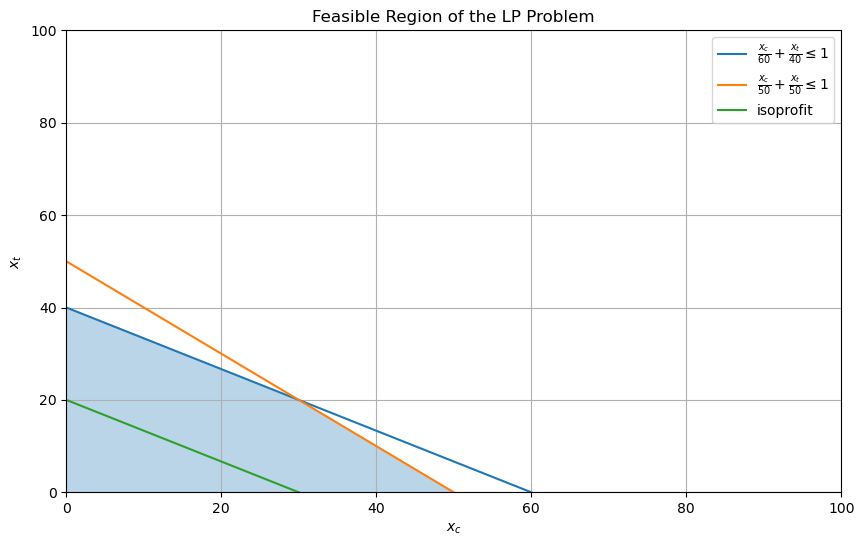

In [235]:
def constraint1(x):
    return (1 - x / 60) * 40

def constraint2(x):
    return (1 - x / 50) * 50

def isoprofit(xi):
    return -(2/3)*xi + 20

x = np.linspace(0, 100, 400)


plt.figure(figsize=(10, 6))
plt.plot(x, constraint1(x), label=r'$\frac{x_c}{60} + \frac{x_t}{40} \leq 1$')
plt.plot(x, constraint2(x), label=r'$\frac{x_c}{50} + \frac{x_t}{50} \leq 1$')
plt.plot(x, isoprofit(x), label="isoprofit")

y_min = np.minimum(constraint1(x), constraint2(x))
plt.fill_between(x, 0, y_min, interpolate=True, alpha=0.3)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel(r'$x_c$')
plt.ylabel(r'$x_t$')
plt.title('Feasible Region of the LP Problem')
plt.legend()
plt.grid(True)
plt.show()

Here, we see that the isoprofit line $x_t =  -\frac{2}{3}x_c + 20$ is parallel to the first constraint. This indicates a multi-solution linear programming problem.

## 4. Infeasible & Unbounded problems

An ***infeasible problem*** is one where no solution exists that satisfies all constraints simultaneously. For example:

\begin{align*}
\max            \quad & z = x_1 + x_2 \\
\text{s.t.}     \quad & x_1 + 2x_2 &\le 5 \\
                \quad & 2x_1 + 4x_2 &\ge 12 \\
                \quad & x_1 - x_2 &\ge 3 \\
                \quad & x_1, x_2 &\ge 0
\end{align*}

In this example, the first and third constraints are inconsistent with each other, making it impossible to find a solution that satisfies both. If we attempt to graph these constraints, we'll find that the feasible regions do not overlap, thus the problem is infeasible.

An ***unbounded problem*** is one where the objective function can increase indefinitely without ever violating any of the constraints. For example:
\begin{align*}
\max            \quad & z = 3x_1 + 3x_2 \\
\text{s.t.}     \quad & x_1 - x_2 &\ge 2 \\
                \quad & -x_1 + 2x_2 &\le 4 \\
                \quad & x_1 &\ge 0
\end{align*}

In this example, there is no upper limit for $x_2$ in the objective function or the constraints. So, as $x_2$ grows larger, the value of the objective function will also grow larger without bound. This means the LP problem is unbounded.

***Note:*** Carefully analyze the problem and constraints to correctly identify infeasible and unbounded problems. In practical applications, LP solvers will typically return a status indicating whether the problem is infeasible, unbounded, or if an optimal solution has been found.

## 5. A Diet Problem

My diet requires that all the food I eat come from one of the four “basic food groups” (chocolate cake, ice cream, soda, and cheesecake). At present, the following four foods are available for consumption: brownies, chocolate ice cream, cola, and pineapple cheesecake. Each brownie costs 50¢, each scoop of chocolate ice cream costs 20¢, each bottle of cola costs 30¢, and each piece of pineapple cheesecake costs 80¢. Each day, I must ingest at least 500 calories, 6 oz of chocolate, 10 oz of sugar, and 8 oz of fat. The nutritional content per unit of each food is shown in Table 2. Formulate a linear programming model that can be used to satisfy my daily nutritional requirements at minimum cost:

| Type of Food       | Calories | Chocolate (Ounces) | Sugar (Ounces) | Fat (Ounces) |
|--------------------|----------|---------------------|----------------|--------------|
| Brownie            | 400      | 3                   | 2              | 2            |
| Chocolate ice cream (1 scoop) | 200 | 2 | 2 | 4 |
| Cola (1 bottle)    | 150      | 0                   | 4              | 1            |
| Pineapple cheesecake (1 piece) | 500 | 0 | 4 | 5 |



<br>

\begin{align*}

\min                \quad   &   \text{cost} = 50x_b + 20x_i + 30x_c + 80x_p \\
\text{s.t.}         \quad   &   \text{calories} = 400x_b + 200x_i + 150x_c + 500x_p &\ge 500\\
                    \quad   &   \text{chocolate} = 3x_b + 2x_i &\ge 6\\
                    \quad   &   \text{sugar} = 2x_b + 2x_i + 4x_c + 4x_p &\ge  10\\
                    \quad   &   \text{fat} = 2x_b + 4x_i + x_c + 5x_p &\ge 8\\
                    \quad   &   x_b,x_i,x_c,x_p & \in \mathbb{Z}^+
\end{align*}

In [236]:
def calories(vec):
    return 400*vec[0] + 200*vec[1] + 150*vec[2] + 500*vec[3]

ps = ["b", "i", "c", "p"]
cals = [400, 200, 150, 500]
choc = [3, 2, 0, 0]
sugar = [2, 2, 4, 4]
fat = [2, 4, 1, 5]
min_reqs = [500, 6, 10, 8]
cost = [50, 20, 30, 80]

model = LpProblem("minimize_cost", LpMinimize)

x = LpVariable.dicts("x", ps, lowBound=0, cat="Integer")

model += lpSum([x[ps[i]] * cost[i] for i in range(len(ps))])

for n, req in zip([cals, choc, sugar, fat], min_reqs): 
    model += lpSum([x[ps[i]] * n[i] for i in range(len(ps))]) >= req

model.solve()

if model.status == 1:
    for k, v in x.items():
        print(f"{k} = {v.varValue}")
    print()
    print(f"cost = {model.objective.value()}¢")
    print(f"calories = {calories([v.varValue for v in x.values()])}")

b = 0.0
i = 3.0
c = 1.0
p = 0.0

cost = 90.0¢
calories = 750.0


### Problems

1. There are three factories on the Momiss River (1, 2, and 3). Each emits two types of pollutants (1 and 2) into the river. If the waste from each factory is processed, the pollution in the river can be reduced. It costs $15 to process a ton of factory 1 waste, and each ton processed reduces the amount of pollutant 1 by 0.10 ton and the amount of pollutant 2 by 0.45 ton. It costs $10 to process a ton of factory 2 waste, and each ton processed will reduce the amount of pollutant 1 by 0.20 ton and the amount of pollutant 2 by 0.25 ton. It costs $20 to process a ton of factory 3 waste, and each ton processed will reduce the amount of pollutant 1 by 0.40 ton and the amount of pollutant 2 by 0.30 ton. The state wants to reduce the amount of pollutant 1 in the river by at least 30 tons and the amount of pollutant 2 in the river by at least 40 tons. Formulate an LP that will minimize the cost of reducing pollution by the desired amounts. Do you think that the LP assumptions (Proportionality, Additivity, Divisibility, and Certainty) are reasonable for this problem?

\begin{align*}
\min            \quad   &   15w_1 + 10w_2 + 20w_3\\
\text{s.t.}     \quad   &   0.1w_1 + 0.2w_2 + 0.4w_3 &\ge 30\\
                \quad   &   0.45w_1 + 0.25w_2 + 0.3w_3 &\ge 40\\
                \quad   &   w_1,w_2,w_3 &\in    \mathbb{R}^+
\end{align*}

>Regarding the Linear Programming (LP) assumptions of Proportionality, Additivity, Divisibility, and Certainty in the context of the pollution reduction problem:
>
>- **Proportionality**: This assumption is valid if the cost and pollution reduction per ton of waste processed are constant. For this scenario, each factory's cost and effectiveness in reducing pollutants per ton of waste are specified as constant, fulfilling this assumption.
>
>- **Additivity**: This assumes that the total cost and pollution reduction are the sum of individual contributions without interaction effects. This seems reasonable here, as the total cost and pollution reduction are presented as the sum of the individual costs and reductions from each factory's waste processing.
>
>- **Divisibility**: This implies that the decision variables (tons of waste processed) can take on fractional values. While waste processing might not always be perfectly divisible, especially on smaller scales, for a large-scale operation as implied here, this assumption is likely reasonable, allowing for fractional tons in the model.
>
>- **Certainty**: This assumes that all coefficients (costs and pollution reduction rates) are known and constant. The problem statement provides fixed costs and reduction rates, suggesting that the model operates under certainty. However, in real-world scenarios, these factors might vary due to various external factors, introducing some level of uncertainty.
>
>While the LP assumptions appear reasonable within the simplified context of the problem, real-world complexities could challenge these assumptions, particularly the aspects of divisibility and certainty.


2. U.S. Labs manufactures mechanical heart valves from the heart valves of pigs. Different heart operations require valves of different sizes. U.S. Labs purchases pig valves from three different suppliers. The cost and size mix of the valves purchased from each supplier are given in the table below. Each month, U.S. Labs places one order with each supplier. At least 500 large, 300 medium, and 300 small valves must be purchased each month. Because of limited availability of pig valves, at most 700 valves per month can be purchased from each supplier. Formulate an LP that can be used to minimize the cost of acquiring the needed valves.

| Supplier | Cost Per Valve ($) | Percent Large | Percent Medium | Percent Small |
|----------|--------------------|---------------|----------------|---------------|
| 1        | 5                  | 40%           | 40%            | 20%           |
| 2        | 4                  | 30%           | 35%            | 35%           |
| 3        | 3                  | 20%           | 20%            | 60%           |

\begin{align*}

\min            \quad   &   5x_1 + 4x_2 + 3x_3\\
\text{s.t.}     \quad   &   0.4x_1 + 0.3x_2 + 0.2x_3    &\ge    500\\
                \quad   &   0.4x_1 + 0.35x_2 + 0.2x_3    &\ge   300\\
                \quad   &   0.2x_1 + 0.35x_2 + 0.6x_3    &\ge   300\\
                \quad   &   0 \le x_1,x_2,x_3 \le 700\\
                \quad   &   x_1,x_2,x_3 \in \mathbb{Z}

\end{align*}

3. Peg and Al Fundy have a limited food budget, so Peg is trying to feed the family as cheaply as possible. However, she still wants to make sure her family members meet their daily nutritional requirements. Peg can buy two foods. Food 1 sells for $7 per pound, and each pound contains 3 units of vitamin A and 1 unit of vitamin C. Food 2 sells for $1 per pound, and each pound contains 1 unit of each vitamin. Each day, the family needs at least 12 units of vitamin A and 6 units of vitamin C.Verify that Peg should purchase 12 units of food 2 each day and thus oversatisfy the vitamin C requirement by 6 units.


\begin{align*}
\min            \quad   &   \text{cost} = 7x_1 + x_2 \\
\text{s.t}      \quad   &   \text{vitamin A} = 3x_1 + x_2 &\ge 12 \\
                \quad   &   \text{vitamin C} = x_1 + x_2 &\ge 6\\
                \quad   &   x_1,x_2 & \in \mathbb{Z}^+
\end{align*}

In [237]:
def const_1(vec):
    return 3*vec[0] + vec[1]

def const_2(vec):
    return vec[0] + vec[1]

foods = [1, 2]
costs = [7, 1]
vit_a = [3, 1]
vit_c = [1, 1]
consts = [12, 6]

model = LpProblem("min_cost", LpMinimize)

x = LpVariable.dicts("x", foods, lowBound=0, cat="Integer")

model += lpSum([x[foods[i]] * costs[i] for i in range(len(foods))])

for n, const in zip([vit_a, vit_c], consts):
    model += lpSum([x[foods[i]] * n[i] for i in range(len(foods))]) >= const

model.solve()

if model.status == 1:
    print(x[2].varValue - consts[1])
    print()
    for k, v in x.items():
        print(f"{k} = {v.varValue}")

6.0

1 = 0.0
2 = 12.0


3. Goldilocks  needs  to  find  at  least  12  lb  of  gold  and  at
least 18 lb of silver to pay the monthly rent. There are two
mines  in  which  Goldilocks  can  find  gold  and  silver.  Each
day that Goldilocks spends in mine 1, she finds 2 lb of gold
and 2 lb of silver. Each day that Goldilocks spends in mine
2, she finds 1 lb of gold and 3 lb of silver. Formulate an LP
to help Goldilocks meet her requirements while spending as
little time as possible in the mines. Graphically solve the LP.

\begin{align*}
\min    \quad   &   t_1 + t_2\\
\text{s.t.} \quad   &   2t_1 + t_2 &\ge 12 && (\text{gold})\\
            \quad   &   2t_1 + 3t_2 &\ge 18 && (\text{silver})\\
            \quad   &   t_1,t_2 &\in \mathbb{R}^+
\end{align*}

\begin{align*}

\text{gold} \quad   &   t_2 \ge -2t_1 + 12\\
\text{silver}   \quad   &   t_2 \ge -\frac{2}{3}t_1 + 6

\end{align*}

1 = 4.5
2 = 3.0


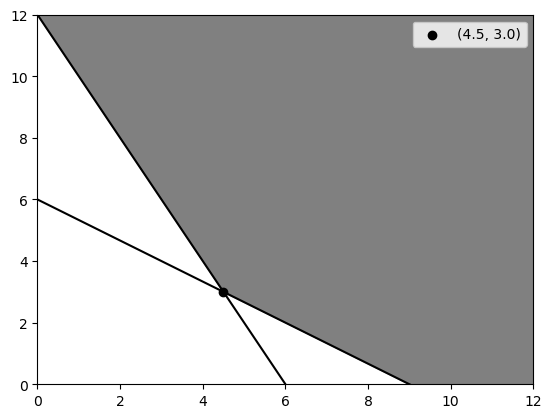

In [238]:
def gold_const(t1):
    return -2*t1 + 12

def silver_const(t1):
    return (-2/3)*t1 + 6

mines = [1, 2]
reqs = [12, 18]
gold = [2, 1]
silver = [2, 3]

model = LpProblem("min_time", LpMinimize)

t = LpVariable.dicts("t", mines, lowBound=0, cat="Continuous")

model += lpSum([t[m] for m in mines])

for n, c in zip([gold, silver], reqs):
    model += lpSum([n[i] * t[mines[i]] for i in range(len(mines))]) >= c

model.solve()

optimal_solution = []
for k, v in t.items():
    print(f"{k} = {v.varValue}")
    optimal_solution.append(v.varValue)

t1s = np.linspace(0, 15, 10000)

plt.plot(t1s, gold_const(t1s), color="k")
plt.plot(t1s, silver_const(t1s), color="k")
plt.ylim(0, 12)
plt.xlim(0, 12)

plt.fill_between(t1s, gold_const(t1s), 12, gold_const(t1s) > silver_const(t1s), color="grey")
plt.fill_between(t1s, silver_const(t1s), 12, silver_const(t1s) > gold_const(t1s), color="grey")
plt.scatter(optimal_solution[0], optimal_solution[1], color="k", label=tuple(optimal_solution))

plt.legend()
plt.show()

## 6. Scheduling

***Example***<br>
A post office requires different numbers of full-time employees on different days of the week. The number of full-time employees required on each day is given below. Union rules state that each full-time employee must work five consecutive days and then receive two days off. For example, an employee who works Monday to Friday must be off on Saturday and Sunday. The post office wants to meet its daily requirements using only full-time employees. Formulate an LP that the post office can use to minimize the number of full-time employees who must be hired.

| Day | Number of Full-time Employees Required |
|-----|----------------------------------------|
| 1 = Monday | 17 |
| 2 = Tuesday | 13 |
| 3 = Wednesday | 15 |
| 4 = Thursday | 19 |
| 5 = Friday | 14 |
| 6 = Saturday | 16 |
| 7 = Sunday | 11 |


***Solution***

\begin{align*}
\text{total number of employees } \quad & E = x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7\\
\quad\\
\min \quad & E\\
\text{s.t.} \quad   &   \text{Monday} = x_1 + x_4 + x_5 + x_6 + x_7 &\ge 17\\
            \quad   &   \text{Tuesday} = x_1 + x_2 + x_5 + x_6 + x_7 &\ge 13\\
            \quad   &   \text{Wednesday} = x_1 + x_2 + x_3 + x_6 + x_7 &\ge 15\\
            \quad   &   \text{Thursday} = x_1 + x_2 + x_3 + x_4 + x_7 &\ge 19\\
            \quad   &   \text{Friday} = x_1 + x_2 + x_3 + x_4 + x_5 &\ge 14\\
            \quad   &   \text{Saturday} = x_2 + x_3 + x_4 + x_5 + x_6 &\ge 16\\
            \quad   &   \text{Sunday} = x_3 + x_4 + x_5 + x_6 + x_7 &\ge 11\\
            \quad   &   x_i &\in \mathbb{Z}^+ && \forall i \in \{1,2,3,4,5,6,7\}
\end{align*}

In [239]:
days = range(7)
emps = [17, 13, 15, 19, 14, 16, 11]
n_days = len(days)
day_dict = dict(zip(days, ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]))

model = LpProblem("min_employees", LpMinimize)

x = LpVariable.dicts("x", days, lowBound=0, cat="Integer")

model += lpSum([x[i] for i in days])

for i in days:
    model += lpSum(([x[i] + x[(i-4)%n_days]] + x[(i-3)%n_days] + x[(i-2)%n_days] + x[(i-1)%n_days])) >= emps[i]

model.solve()

if model.status == 1:
    for k, v in x.items():
        print(f"{day_dict[k]} \t= {v.varValue:,.0f} employees")
    print()
    print(f"Minimum number of employees to hire: {model.objective.value():,.0f}")

Mon 	= 2 employees
Tues 	= 6 employees
Wed 	= 0 employees
Thurs 	= 7 employees
Fri 	= 0 employees
Sat 	= 3 employees
Sun 	= 5 employees

Minimum number of employees to hire: 23


### Problems

1. In the post office example, suppose that each full-time employee works 8 hours per day. Thus, Monday’s requirement of 17 workers may be viewed as a requirement of 8(17) = 136 hours. The post office may meet its daily labor requirements by using both full-time and part-time employees. During each week, a full-time employee works 8 hours a day for five consecutive days, and a part-time employee works 4 hours a day for five consecutive days. A full-time employee costs the post office $15 per hour, whereas a part-time employee (with reduced fringe benefits) costs the post office only $10 per hour. Union requirements limit part-time labor to 25% of weekly labor requirements. Formulate an LP to minimize the post office’s weekly labor costs.

| Day | Hours Required
|-----|----------------------------------------
| 0 = Monday | 136
| 1 = Tuesday | 104 
| 2 = Wednesday | 120 
| 3 = Thursday | 152 
| 4 = Friday | 112 
| 5 = Saturday | 128 
| 6 = Sunday | 88 


\begin{aligned}
\min \quad & \sum^6_{i=0}15f_i + 10p_i
\quad\\
\text{s.t.} \quad   &   8f_i + 4p_i & \ge \text{hours required for day } i && \forall i \in \{0,...,6\}\\
            \quad   &   \sum^{6}_{i=0}4p_i &\le \sum^{6}_{i=0}0.25(8f_i)\\
            \quad   &   f_i, p_i    &\in    \mathbb{Z}^+  && \forall i \in \{0,...,6\}
\end{aligned}

In [240]:
hours = [136, 104, 120, 152, 112, 128, 88]
f_c = 15
p_c = 10
f_h = 8
p_h = 4

hours = dict(zip(days, hours))

f = LpVariable.dicts("f", days, lowBound=0, cat="Integer")
p = LpVariable.dicts("p", days, lowBound=0, cat="Integer")

model = LpProblem("minimize_cost", LpMinimize)

model += f_c * lpSum(f[i] for i in days)  + p_c * lpSum(p[i] for i in days)

for i in days:
    model += f_h * f[i] + p_h * p[i] >= hours[i]

model += lpSum([4 * p[i] for i in days]) <= 0.25 * lpSum([8 * f[i] for i in days])

model.solve()

if model.status == 1:
    for (k0, v0), (k1, v1) in zip(f.items(), p.items()):
        print(f"f{k0} = {v0.varValue} | p{k1} = {v1.varValue}")

f0 = 17.0 | p0 = 0.0
f1 = 13.0 | p1 = 0.0
f2 = 15.0 | p2 = 0.0
f3 = 19.0 | p3 = 0.0
f4 = 14.0 | p4 = 0.0
f5 = 16.0 | p5 = 0.0
f6 = 11.0 | p6 = 0.0


2. During each 4-hour period, the Smalltown police force requires the following number of on-duty police officers: 12 midnight to 4 A.M.—8; 4 to 8 A.M.—7; 8 A.M. to 12 noon—6; 12 noon to 4 P.M.—6; 4 to 8 P.M.—5; 8 P.M. to 12 midnight—4. Each police officer works two consecutive 4-hour shifts. Formulate an LP that can be used to minimize the number of police officers needed to meet Smalltown’s daily requirements.

Time| Idx| Officers
-|-|-
12AM - 4AM|0|8
4AM - 8AM|1|7
8AM - 12PM|2|6
12PM - 4PM|3|6
4PM - 8PM|4|5
8PM - 12AM|5|4

\begin{aligned}
\min    \quad   &   \sum^5_{i=0}o_i\\
\text{s.t.}    \quad   &   o_i + o_{i-1} &\ge \text{officers needed in chunk } i\\
        \quad   &   o_i &\in    \mathbb{Z}^+
\end{aligned}

In [241]:
chunks = range(6)
officers = [8, 7, 6, 6, 5, 4]
n_chunks = len(chunks)
time_dict = dict(zip(chunks, ["12AM - 4AM", "4AM - 8AM", "8AM - 12PM", "12PM - 4PM", "4PM - 8PM", "8PM - 12AM"]))

model = LpProblem("min_OFFICERS", LpMinimize)

o = LpVariable.dicts("o", chunks, lowBound=0, cat="Integer")

model += lpSum([o[i] for i in chunks])

for i in chunks:
    model += lpSum([o[i] + o[(i-1)%n_chunks]]) >= officers[i]

model.solve()

if model.status == 1:
    for k, v in o.items():
        print(f"{time_dict[k]} \t= {v.varValue:,.0f} officers")
    print()
    print(f"Minimum number of officers to hire: {model.objective.value():,.0f}")

12AM - 4AM 	= 2 officers
4AM - 8AM 	= 5 officers
8AM - 12PM 	= 1 officers
12PM - 4PM 	= 5 officers
4PM - 8PM 	= 0 officers
8PM - 12AM 	= 6 officers

Minimum number of officers to hire: 19


3. During each 6-hour period of the day, the Bloomington Police Department needs at least the number of policemen shown below. Policemen can be hired to work either 12 consecutive hours or 18 consecutive hours. Policemen are paid $4 per hour for each of the first 12 hours a day they work and are paid $6 per hour for each of the next 6 hours they work in a day. Formulate an LP that can be used to minimize the cost of meeting Bloomington’s daily police requirements.

Idx| Time Period  | Number of Policemen Required |
---|--------------|------------------------------|
0  | 12 A.M.–6 A.M. | 12                         |
1  | 6 A.M.–12 P.M. | 8                          |
2  | 12 P.M.–6 P.M. | 6                          |
3  | 6 P.M.–12 A.M. | 15                         |


\begin{aligned}
\min            &&  48(x_0 + x_1 + x_2 + x_3) + 84(y_0 + y_1 + y_2 + y_3)\\
\text{s.t.}     &&  x_0 + x_3 + y_0 + y_3 + y_2 &&\ge 12\\
                &&  x_1 + x_0 + y_1 + y_0 + y_3 &&\ge 8\\
                &&  x_2 + x_1 + y_2 + y_1 + y_0 &&\ge 6\\
                &&  x_3 + x_2 + y_3 + y_2 + y_1 &&\ge 15
\end{aligned}

4. Each hour from 10 A.M. to 7 P.M., Bank One receives checks and must process them. Its goal is to process all the checks the same day they are received. The bank has 13 check-processing machines, each of which can process up to 500 checks per hour. It takes one worker to operate each machine. Bank One hires both full-time and part-time workers. Full-time workers work 10 A.M.–6 P.M., 11 A.M.–7 P.M., or Noon–8 P.M. and are paid $160 per day. Part-time workers work either 2 P.M.–7 P.M. or 3 P.M.–8 P.M. and are paid $75 per day. The number of checks received each hour is given below. In the interest of maintaining continuity, Bank One believes it must have at least three full-time workers under contract. Develop a cost-minimizing work schedule that processes all checks by 8 P.M.

| Time    | Checks Received | 
|---------|-----------------|
| 10 A.M. | 5,000           | 
| 11 A.M. | 4,000           | 
| Noon    | 3,000           |
| 1 P.M.  | 4,000           | 
| 2 P.M.  | 2,500           | 
| 3 P.M.  | 3,000           | 
| 4 P.M.  | 4,000           | 
| 5 P.M.  | 4,500           |
| 6 P.M.  | 3,500           | 
| 7 P.M.  | 3,000           | 

\begin{aligned}
                \quad   &   \text{var}                      & C_{\text{received}} \quad & C_0 \quad & C_{\text{processed}} \quad & C_{1}\\
10\text{ A.M.}  \quad   &   f_1                             & 5000 \quad & 5000 \quad & 500f_1 \quad & 5000 - 500f_1\\
11\text{ A.M.}  \quad   &   f_1 + f_2                       & 4000 \quad & 9000 - 500f_1 \quad & 500(f_1 + f_2) \quad & 9000 - 1000f_1 - 500f_2  \\
12\text{ P.M.}  \quad   &   f_1 + f_2 + f_3                 & 3000 \quad & 12000 - 1000f_1 - 500f_2 \quad & 500(f_1 + f_2 + f_3) \quad & ...\\
1\text{ P.M.}   \quad   &   f_1 + f_2 + f_3                 & 4000 \quad & ... \quad & 500(f_1 + f_2 + f_3) \quad & ...\\
2\text{ P.M.}   \quad   &   f_1 + f_2 + f_3 + p_1           & 2500 \quad & ... \quad & 500(f_1 + f_2 + f_3 + p_1) \quad & ...\\
3\text{ P.M.}   \quad   &   f_1 + f_2 + f_3 + p_1 + p_2     & 3000 \quad & ... \quad & 500(f_1 + f_2 + f_3 + p_1 + p_2) \quad & ...\\
4\text{ P.M.}   \quad   &   f_1 + f_2 + f_3 + p_1 + p_2     & 4000 \quad & ... \quad & 500(f_1 + f_2 + f_3 + p_1 + p_2) \quad & ...\\
5\text{ P.M.}   \quad   &   f_1 + f_2 + f_3 + p_1 + p_2     & 4500 \quad & ... \quad & 500(f_1 + f_2 + f_3 + p_1 + p_2) \quad & ...\\
6\text{ P.M.}   \quad   &   f_2 + f_3 + p_1 + p_2           & 3500 \quad & ... \quad & 500(f_2 + f_3 + p_1 + p_2) \quad & ...\\
7\text{ P.M.}   \quad   &   f_3 + p_2                       & 3000 \quad & ... \quad & 500(f_3 + p_2) \quad & ...\\[10pt]                                                                                                                                       
\end{aligned}


\begin{aligned}
&& 36500 - 8(500f_1) - 8(500f_2) - 8(500f_3) - 5(500p_1) - 5(500p_2) \quad & = 0\\
\rightarrow \quad && 36500 - 500(8f_1 + 8f_2 + 8f_3 + 5p_1 + 5p_2) \quad & = 0\\
\rightarrow \quad && 73 - (8f_1 + 8f_2 + 8f_3 + 5p_1 + 5p_2) \quad & = 0\\
\rightarrow \quad && 8f_1 + 8f_2 + 8f_3 + 5p_1 + 5p_2 \quad & = 73\\
\end{aligned}


\begin{aligned}
\min \quad & 160(f_1 + f_2 + f_3) + 75(p_1 + p_2)\\
\text{s.t.} \quad   &   8f_1 + 8f_2 + 8f_3 + 5p_1 + 5p_2 &= 73\\
            \quad   &   f_1 + f_2 + f_3 &\ge 3\\
            \quad   &   f_1 + f_2 + f_3 + p_1 + p_2 &\le 13\\
            \quad   &   f_1, f_2, f_3, p_1, p_2 &\ge 0
\end{aligned}

In [242]:
f_i = [1, 2, 3]
p_i = [1, 2]

f = LpVariable.dicts("f", f_i, lowBound=0, cat="Integer")
p = LpVariable.dicts('p', p_i, lowBound=0, cat="Integer")

model = LpProblem("min_cost", LpMinimize)

model += lpSum([160 * f[i] for i in f_i] + [75 * p[j] for j in p_i])

model += lpSum([8 * f[i] for i in f_i] + [5 * p[j] for j in p_i]) == 73

model += lpSum([f[i] for i in f_i]) >= 3

model += lpSum([f[i] for i in f_i] + [p[j] for j in p_i]) <= 13

model.solve()

for k, v in f.items():
    print(f"f{k} = {v.varValue}")
print()
for k, v in p.items():
    print(f"p{k} = {v.varValue}")
print()
print(f"Cost: ${model.objective.value():,.2f}")

f1 = 6.0
f2 = 0.0
f3 = 0.0

p1 = 5.0
p2 = 0.0

Cost: $1,335.00


In [243]:
const_1 = np.sum([8 * f[i].varValue for i in f_i] + [5 * p[j].varValue for j in p_i])
const_2 = np.sum([f[i].varValue for i in f_i])
const_3 = np.sum([f[i].varValue for i in f_i] + [p[j].varValue for j in p_i])

const_1 == 73, const_2 >= 3, const_3 <= 13, [f[i].varValue >= 0 for i in f_i], [p[i].varValue >= 0 for i in p_i]

(True, True, True, [True, True, True], [True, True])

## Capital Budgeting

$$\text{NPV} = \sum^T_{t=1}\frac{c_t}{\left(1 + r\right)^t}$$

$$\$1 \text{ today}= \$\left(1 + r\right) \text{ a year from now}$$

In [244]:
def NPV(c_t, r):
    return np.sum([c_t[i] / ((1 + r)**(i)) for i in range(len(c_t))])

***Example***<br>
For a discount rate of 15%, consider a project with the cash flows shown below:

Time|1|2|3|4|5|6|7
-|-|-|-|-|-|-|-
$\text{ }$|-400|200|600|-900|1000|250|230

- Compute project NPV if cash flows are at the end of the year.
- Compute project NPV if cash flows are at the beginning of the year.
- Compute project NPV if cash flows are at the middle of the year.

In [245]:
cf = np.array([-400, 200, 600, -900, 1000, 250, 230])

a = f"${NPV(cf, 0.15):,.2f}"
b = f"${NPV(cf, 0.15) * 1.15:,.2f}"
c = f"${NPV(cf, 0.15) * (1.15 ** 0.5):,.2f}"

a, b, c

('$431.32', '$496.02', '$462.54')

$$\text{XNPV} = \sum_{t=0}^{T} \frac{c_t}{(1 + r)^{\frac{d_t - d_0}{365}}}$$


In [246]:
def XNPV(c_t, r):
    dates = list(c_t.keys())
    return np.sum([c / (1 + r) ** (((dates[i] - dates[0]).days)/365) for i, c in enumerate(c_t.values())])

***Example***<br>
| Date    | Cash Flow |
|---------|-----------|
| 4/8/01  | -900      |
| 8/15/01 | 300       |
| 1/15/02 | 400       |
| 6/25/02 | 200       |
| 7/3/03  | 100       |


In [247]:
dates = [
    "2001-04-08",
    "2001-08-15",
    "2002-01-15",
    "2002-06-25",
    "2003-07-03"
]

dates = [pd.Timestamp(d) for d in dates]
cashflow = [-900, 300, 400, 200, 100]
c_t = dict(zip(dates, cashflow))

f"${XNPV(c_t, 0.1):,.2f}"

'$20.63'

Star Oil Company is considering five different investment opportunities. The cash outflows and net present values (in millions of dollars) are given in Table 7. Star Oil has \$40 million available for investment now (time 0); it estimates that one year from now (time 1) \$20 million will be available for investment. Star Oil may purchase any fraction of each investment. In this case, the cash outflows and NPV are adjusted accordingly. For example, if Star Oil purchases one-fifth of investment 3, then a cash outflow of $\frac{1}{5}(5)$ = \$1 million would be required at time 0, and a cash outflow of $\frac{1}{5}(5)$ = \$1 million would be required at time 1. The one-fifth share of investment 3 would yield an NPV of $\frac{1}{5}(16)$ = \$3.2 million. Star Oil wants to maximize the NPV that can be obtained by investing in investments 1–5. Formulate an LP that will help achieve this goal. Assume that any funds left over at time 0 cannot be used at time 1.

|                       | Investment 1 | Investment 2 | Investment 3 | Investment 4 | Investment 5 |
|-----------------------|--------------|--------------|--------------|--------------|--------------|
| Time 0 cash outflow   | 11           | 53           | 5            | 5            | 29           |
| Time 1 cash outflow   | 3            | 6            | 5            | 1            | 34           |
| NPV                   | 13           | 16           | 16           | 14           | 39           |


\begin{aligned}
\max        &&  13x_1 + 16x_2 + 16x_3 + 14x_4 + 39x_5\\
\text{s.t.} &&  11x_1 + 53x_2 + 5x_3 + 5x_4 + 29x_5 &\le 40\\
            &&  3x_1 + 6x_2 + 5x_3 + x_4 + 34x_5 &\le 20\\
            && x_1,x_2,x_3,x_4,x_5                &\ge 0\\
            && x_1,x_2,x_3,x_4,x_5                &\le 1
\end{aligned}

In [248]:
t0 = [11, 53, 5, 5, 29]
t1 = [3, 6, 5, 1, 34]
npv = [13, 16, 16, 14, 39]

model = LpProblem("max_npv", LpMaximize)

x = LpVariable.dicts("x", range(len(t0)), lowBound=0, cat="Continuous")

model += lpSum([npv[i] * x[i] for i in range(len(x))])

model += lpSum([t0[i] * x[i] for i in range(len(x))]) <= 40
model += lpSum([t1[i] * x[i] for i in range(len(x))]) <= 20

for i in range(len(x)):
    model += x[i] <= 1

model.solve()

if model.status == 1:
    for k, v in x.items():
        print(f"Investment {k+1} = {v.varValue*100:,.2f}%")
    print()
    print("time 0:", [f"${t0[i] * x[i].varValue:,.3f}M" for i in range(len(x))])
    print("time 1:", [f"${t1[i] * x[i].varValue:,.3f}M" for i in range(len(x))])
    print("NPV:", [f"${npv[i] * x[i].varValue:,.3f}M" for i in range(len(x))])
    print()
    print(f"Total NPV: ${model.objective.value():,.3f}M")

Investment 1 = 100.00%
Investment 2 = 20.09%
Investment 3 = 100.00%
Investment 4 = 100.00%
Investment 5 = 28.81%

time 0: ['$11.000M', '$10.646M', '$5.000M', '$5.000M', '$8.354M']
time 1: ['$3.000M', '$1.205M', '$5.000M', '$1.000M', '$9.795M']
NPV: ['$13.000M', '$3.214M', '$16.000M', '$14.000M', '$11.235M']

Total NPV: $57.449M


### Problems

1. Two investments with varying cash flows (in thousands of dollars) are available, as shown in Table 8. At time 0, \$10,000 is available for investment, and at time 1, \$7,000 is available. Assuming that $r = 0.10$, set up an LP whose solution maximizes the NPV obtained from these investments. Graphically find the optimal solution to the LP.

$i$|$C_0$|$C_1$|$C_2$|$C_3$|NPV
-|-|-|-|-|-|
1|-6|-6|7|9|$N_1$
2|-8|-3|9|7|$N_2$


\begin{aligned}
\max                &&  x_1N_1 + x_2N_2\\
\text{s.t.}         &&  6x_1 + 8x_2 &\le 10\\
                    && 6x_1 + 3x_2 &\le 7\\[10pt]
\text{where}        && N_i = \sum^3_{t=0}\frac{C_{ti}}{\left(1 + 0.10 \right)^t}
\end{aligned}

In [269]:
t1 = [-6, -6, 7, 9]
t2 = [-8, -3, 9, 7]

r = 0.1
N1 = NPV(t1, r)
N2 = NPV(t2, r)

model = LpProblem("max_npv", LpMaximize)

x = LpVariable.dicts("x", [0, 1], lowBound=0, upBound=1, cat="Continuous")

model += x[0] * N1 + x[1] * N2

model += lpSum(6*x[0] + 8*x[1]) <= 10
model += lpSum(6*x[0] + 3*x[1]) <= 7

model.solve()

optimal_solution = []
if model.status == 1:
    for k, v in x.items():
        print(f"Investment {k+1} = {v.varValue*100:,.2f}%")
        optimal_solution.append(v.varValue)
    print(f"NPV: ${model.objective.value():,.2f}")

Investment 1 = 33.33%
Investment 2 = 100.00%
NPV: $2.33


(0.0, 1.0)

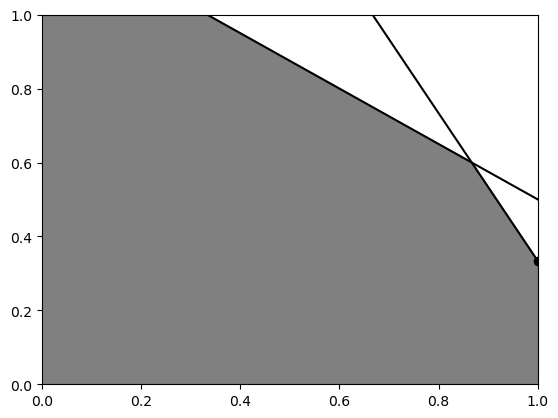

In [266]:
def const_1(x):
    return (-6/8)*x + (10/8)

def const_2(x):
    return (-6/3)*x + (7/3)

x = np.linspace(0, 1, 1000)

plt.plot(x, const_2(x), color="k")
plt.plot(x, const_1(x), color="k")

plt.fill_between(x, const_1(x), where=const_1(x) < const_2(x), color='grey')
plt.fill_between(x, const_2(x), where=const_1(x) > const_2(x), color='grey')
plt.scatter(optimal_solution[1], optimal_solution[0], color="k", label=tuple(optimal_solution))

plt.xlim(0, 1)
plt.ylim(0, 1)

(array([], dtype=int64),)